# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Data Understanding**

## Membaca Dataset

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,nose_x,nose_y,neck_x,neck_y,Rshoulder_x,Rshoulder_y,Relbow_x,Relbow_y,Rwrist_x,RWrist_y,...,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y,class
0,0.55,0.46,0.54,0.52,0.51,0.52,0.52,0.57,0.54,0.50,...,0.91,0.54,0.46,0.00,0.00,0.52,0.46,0.55,0.46,stand
1,0.54,0.46,0.54,0.52,0.51,0.52,0.49,0.61,0.50,0.65,...,0.91,0.54,0.46,0.55,0.46,0.52,0.46,0.56,0.46,stand
2,0.54,0.46,0.54,0.52,0.51,0.52,0.49,0.59,0.50,0.65,...,0.91,0.54,0.46,0.55,0.46,0.52,0.46,0.56,0.46,stand
3,0.54,0.46,0.54,0.52,0.51,0.52,0.49,0.59,0.50,0.65,...,0.91,0.54,0.44,0.55,0.44,0.52,0.46,0.55,0.46,stand
4,0.54,0.46,0.54,0.52,0.51,0.52,0.50,0.59,0.51,0.65,...,0.91,0.54,0.44,0.55,0.44,0.52,0.46,0.55,0.46,stand


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nose_x       2826 non-null   float64
 1   nose_y       2826 non-null   float64
 2   neck_x       2826 non-null   float64
 3   neck_y       2826 non-null   float64
 4   Rshoulder_x  2826 non-null   float64
 5   Rshoulder_y  2826 non-null   float64
 6   Relbow_x     2826 non-null   float64
 7   Relbow_y     2826 non-null   float64
 8   Rwrist_x     2826 non-null   float64
 9   RWrist_y     2826 non-null   float64
 10  LShoulder_x  2826 non-null   float64
 11  LShoulder_y  2826 non-null   float64
 12  LElbow_x     2826 non-null   float64
 13  LElbow_y     2826 non-null   float64
 14  LWrist_x     2826 non-null   float64
 15  LWrist_y     2826 non-null   float64
 16  RHip_x       2826 non-null   float64
 17  RHip_y       2826 non-null   float64
 18  RKnee_x      2826 non-null   float64
 19  RKnee_

In [5]:
data.shape

(2826, 37)

## Distribusi Class dalam Dataset

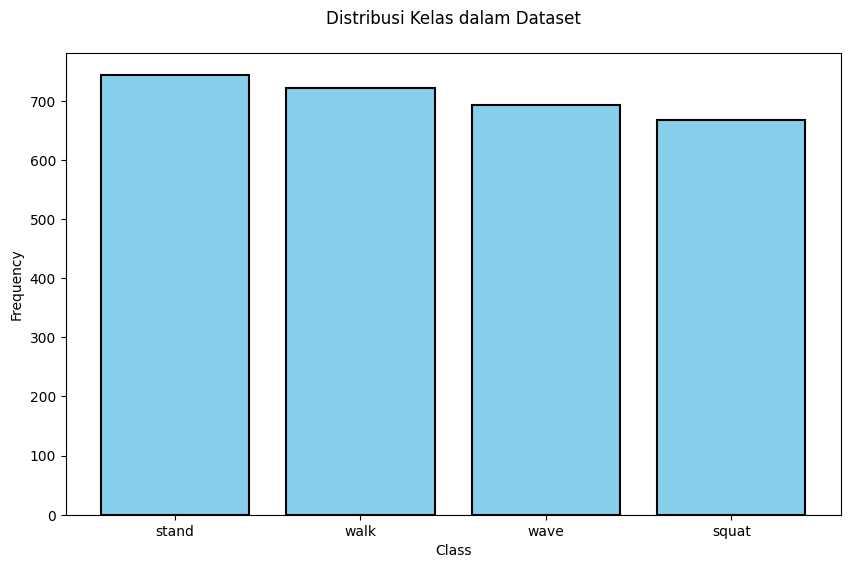

In [6]:
class_distribution = data['class'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution, color='skyblue', edgecolor='black', linewidth=1.5)

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribusi Kelas dalam Dataset\n')
plt.show()

## Ringkasan Data

In [7]:
data.describe()

,nose_x,nose_y,neck_x,neck_y,Rshoulder_x,Rshoulder_y,Relbow_x,Relbow_y,Rwrist_x,RWrist_y,...,LAnkle_x,LAnkle_y,REye_x,REye_y,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y
count,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,...,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000
mean,0.466373,0.473390,0.468822,0.535980,0.430729,0.522919,0.409834,0.568567,0.412682,0.590159,...,0.498885,0.899289,0.433238,0.437930,0.433907,0.432555,0.392328,0.419229,0.427799,0.423581
std,0.162359,0.126528,0.160529,0.115908,0.178459,0.150700,0.187246,0.198410,0.194318,0.236794,...,0.164975,0.116257,0.191952,0.167376,0.197945,0.174294,0.210509,0.196563,0.214556,0.191327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330000,0.390000,0.340000,0.460000,0.310000,0.460000,0.280000,0.520000,0.290000,0.500000,...,0.380000,0.890000,0.310000,0.390000,0.320000,0.390000,0.270000,0.390000,0.320000,0.390000
50%,0.490000,0.440000,0.490000,0.500000,0.460000,0.500000,0.440000,0.590000,0.440000,0.650000,...,0.510000,0.910000,0.460000,0.440000,0.480000,0.410000,0.440000,0.440000,0.480000,0.410000
75%,0.590000,0.460000,0.590000,0.520000,0.560000,0.540000,0.540000,0.630000,0.560000,0.700000,...,0.610000,0.940000,0.570000,0.460000,0.590000,0.460000,0.560000,0.460000,0.590000,0.460000
max,0.830000,0.720000,0.830000,0.740000,0.820000,0.740000,0.840000,0.850000,0.850000,0.890000,...,0.850000,0.980000,0.820000,0.720000,0.830000,0.700000,0.820000,0.720000,0.840000,0.700000


## Pengecekan Missing Values

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

print('Jumalah missing values :', missing_values.sum())

nose_x         0
nose_y         0
neck_x         0
neck_y         0
Rshoulder_x    0
Rshoulder_y    0
Relbow_x       0
Relbow_y       0
Rwrist_x       0
RWrist_y       0
LShoulder_x    0
LShoulder_y    0
LElbow_x       0
LElbow_y       0
LWrist_x       0
LWrist_y       0
RHip_x         0
RHip_y         0
RKnee_x        0
RKnee_y        0
RAnkle_x       0
RAnkle_y       0
LHip_x         0
LHip_y         0
LKnee_x        0
LKnee_y        0
LAnkle_x       0
LAnkle_y       0
REye_x         0
REye_y         0
LEye_x         0
LEye_y         0
REar_x         0
REar_y         0
LEar_x         0
LEar_y         0
class          0
dtype: int64
Jumalah missing values : 0


# Data Preprocessing

## Penerapan One-Hot Encoding pada Label 'Class'

Karena label merupakan kategorikal label yang terdiri dari {stand, walk, wave squat}, maka untuk mempermudah proses klasifikasi label tersebut di encode menggunakan metode One-Hot Encoding

In [9]:
data = pd.get_dummies(data, columns=['class'])
print(data.head())

   nose_x  nose_y  neck_x  neck_y  Rshoulder_x  Rshoulder_y  Relbow_x  \
0    0.55    0.46    0.54    0.52         0.51         0.52      0.52   
1    0.54    0.46    0.54    0.52         0.51         0.52      0.49   
2    0.54    0.46    0.54    0.52         0.51         0.52      0.49   
3    0.54    0.46    0.54    0.52         0.51         0.52      0.49   
4    0.54    0.46    0.54    0.52         0.51         0.52      0.50   

   Relbow_y  Rwrist_x  RWrist_y  ...  LEye_x  LEye_y  REar_x  REar_y  LEar_x  \
0      0.57      0.54      0.50  ...    0.00    0.00    0.52    0.46    0.55   
1      0.61      0.50      0.65  ...    0.55    0.46    0.52    0.46    0.56   
2      0.59      0.50      0.65  ...    0.55    0.46    0.52    0.46    0.56   
3      0.59      0.50      0.65  ...    0.55    0.44    0.52    0.46    0.55   
4      0.59      0.51      0.65  ...    0.55    0.44    0.52    0.46    0.55   

   LEar_y  class_squat  class_stand  class_walk  class_wave  
0    0.46        F

Mengubah nilai pada kolom {class_squat, class_stand, class_walk, class_wave} menjadi integer

In [10]:
data[['class_squat', 'class_stand', 'class_walk', 'class_wave']] = data[['class_squat', 'class_stand', 'class_walk', 'class_wave']].astype(int)
print(data.head())

   nose_x  nose_y  neck_x  neck_y  Rshoulder_x  Rshoulder_y  Relbow_x  \
0    0.55    0.46    0.54    0.52         0.51         0.52      0.52   
1    0.54    0.46    0.54    0.52         0.51         0.52      0.49   
2    0.54    0.46    0.54    0.52         0.51         0.52      0.49   
3    0.54    0.46    0.54    0.52         0.51         0.52      0.49   
4    0.54    0.46    0.54    0.52         0.51         0.52      0.50   

   Relbow_y  Rwrist_x  RWrist_y  ...  LEye_x  LEye_y  REar_x  REar_y  LEar_x  \
0      0.57      0.54      0.50  ...    0.00    0.00    0.52    0.46    0.55   
1      0.61      0.50      0.65  ...    0.55    0.46    0.52    0.46    0.56   
2      0.59      0.50      0.65  ...    0.55    0.46    0.52    0.46    0.56   
3      0.59      0.50      0.65  ...    0.55    0.44    0.52    0.46    0.55   
4      0.59      0.51      0.65  ...    0.55    0.44    0.52    0.46    0.55   

   LEar_y  class_squat  class_stand  class_walk  class_wave  
0    0.46         

## Transformasi Data
Transformasi dilakukan menggunakan RobustScaler, yang bertujuan untuk mengurangi pengaruh outlier dan memastikan data berada dalam rentang yang sesuai.

In [11]:
scaler = RobustScaler()
normalized_data = scaler.fit_transform(data)
data_normalized = pd.DataFrame(normalized_data, columns=data.columns)

X = data_normalized.drop(columns=['class_squat', 'class_stand', 'class_walk', 'class_wave'])
y = data_normalized[['class_squat', 'class_stand', 'class_walk', 'class_wave']]

In [12]:
data_normalized.head()

,nose_x,nose_y,neck_x,neck_y,Rshoulder_x,Rshoulder_y,Relbow_x,Relbow_y,Rwrist_x,RWrist_y,...,LEye_x,LEye_y,REar_x,REar_y,LEar_x,LEar_y,class_squat,class_stand,class_walk,class_wave
0,0.230769,0.285714,0.2,0.333333,0.2,0.25,0.307692,-0.181818,0.370370,-0.75,...,-1.777778,-5.857143,0.275862,0.285714,0.259259,0.714286,0.0,1.0,0.0,0.0
1,0.192308,0.285714,0.2,0.333333,0.2,0.25,0.192308,0.181818,0.222222,0.00,...,0.259259,0.714286,0.275862,0.285714,0.296296,0.714286,0.0,1.0,0.0,0.0
2,0.192308,0.285714,0.2,0.333333,0.2,0.25,0.192308,0.000000,0.222222,0.00,...,0.259259,0.714286,0.275862,0.285714,0.296296,0.714286,0.0,1.0,0.0,0.0
3,0.192308,0.285714,0.2,0.333333,0.2,0.25,0.192308,0.000000,0.222222,0.00,...,0.259259,0.428571,0.275862,0.285714,0.259259,0.714286,0.0,1.0,0.0,0.0
4,0.192308,0.285714,0.2,0.333333,0.2,0.25,0.230769,0.000000,0.259259,0.00,...,0.259259,0.428571,0.275862,0.285714,0.259259,0.714286,0.0,1.0,0.0,0.0


## Membagi Dataset menjadi Data Training dan Data Testing

Data tersebut dibagi dengan ketentuan test_size = 0.2

In [13]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

## Fungsi Aktivasi Sigmoid dan Turunannya

In [14]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

##  Pembuatan dan Pelatihan Neural Network

In [15]:
def initialize_parameters(input_size, hidden_size, output_size):
  W1 = np.random.randn(input_size, hidden_size)
  b1 = np.zeros((1, hidden_size))
  W2 = np.random.randn(hidden_size, output_size)
  b2 = np.zeros((1, output_size))
  return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
  Z1 = np.dot(X, W1) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(A1, W2) + b2
  A2 = sigmoid(Z2)
  return Z1, A1, Z2, A2

def backpropagation(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate):
  m = X.shape[0]
  dZ2 = A2 - y
  dW2 = (1 / m) * np.dot(A1.T, dZ2)
  db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
  dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
  dW1 = (1 / m) * np.dot(X.T, dZ1)
  db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  return W1, b1, W2, b2

## Proses Pelatihan

In [16]:
def train(X, y, input_size, hidden_size, output_size, epochs, learning_rate):
  W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

  for i in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
    W1, b1, W2, b2 = backpropagation(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)

    if i % 100 == 0:
      loss = np.mean((y - A2) ** 2)
      print(f"Epoch {i}, Loss: {loss}")

  return W1, b1, W2, b2

## Evaluasi Model dan Prediksi

In [17]:
input_size = X_train.shape[1]
hidden_size = 9  # Jumlah neuron di hidden layer
output_size = 4 # Jumlah neuron di output layer
epochs = 1000
learning_rate = 0.07


W1, b1, W2, b2 = train(X_train.values, y_train.values, input_size, hidden_size, output_size, epochs, learning_rate)

def predict(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
  return (A2 > 0.5).astype(int)

y_pred = predict(X_test.values, W1, b1, W2, b2)

accuracy = np.mean(y_pred == y_test.values)
print(f"Accuracy: {accuracy}")

Epoch 0, Loss: 0.4172258922630303
Epoch 100, Loss: 0.12468288812889286
Epoch 200, Loss: 0.09439364986356125
Epoch 300, Loss: 0.07559776842867455
Epoch 400, Loss: 0.061599963627875634
Epoch 500, Loss: 0.05038143856785931
Epoch 600, Loss: 0.04131135924033437
Epoch 700, Loss: 0.0343730779306919
Epoch 800, Loss: 0.027973235296593228
Epoch 900, Loss: 0.023575823897418465
Accuracy: 0.9942579505300353


# Evaluation

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

labels = y.columns
for i, label in enumerate(labels):
    print("="*50)
    print(f"Performance for {label}:")
    print("-"*50)

    y_true = y_test.iloc[:, i]
    y_pred_label = y_pred[:, i]

    cm = confusion_matrix(y_true, y_pred_label)
    print("Confusion Matrix:")
    print(cm)
    print()

    report = classification_report(y_true, y_pred_label, zero_division=0)
    print("Classification Report:")
    print(report)
    print("="*50)

print("="*50)
print("Overall Multi-label Performance:")
print("-"*50)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("="*50)

Performance for class_squat:
--------------------------------------------------
Confusion Matrix:
[[448   0]
 [  1 117]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       448
         1.0       1.00      0.99      1.00       118

    accuracy                           1.00       566
   macro avg       1.00      1.00      1.00       566
weighted avg       1.00      1.00      1.00       566

Performance for class_stand:
--------------------------------------------------
Confusion Matrix:
[[413   1]
 [  4 148]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       414
         1.0       0.99      0.97      0.98       152

    accuracy                           0.99       566
   macro avg       0.99      0.99      0.99       566
weighted avg       0.99      0.99      0.99       566

Performance for class_walk:
----------------------------

Performance for class_squat:
--------------------------------------------------


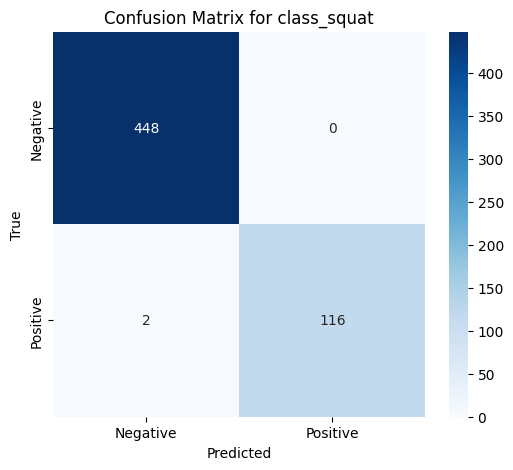

Confusion Matrix:
[[448   0]
 [  2 116]]



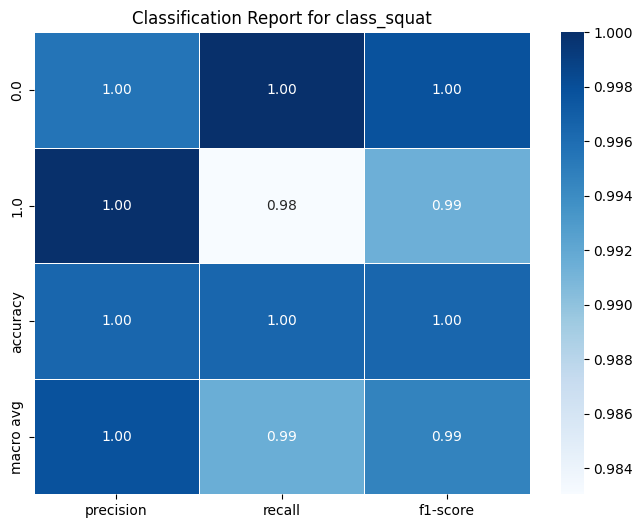

Performance for class_stand:
--------------------------------------------------


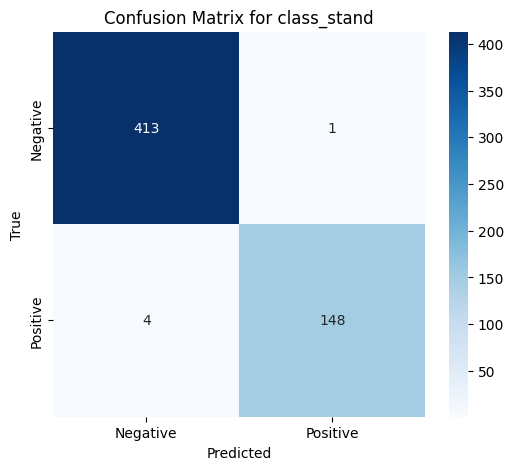

Confusion Matrix:
[[413   1]
 [  4 148]]



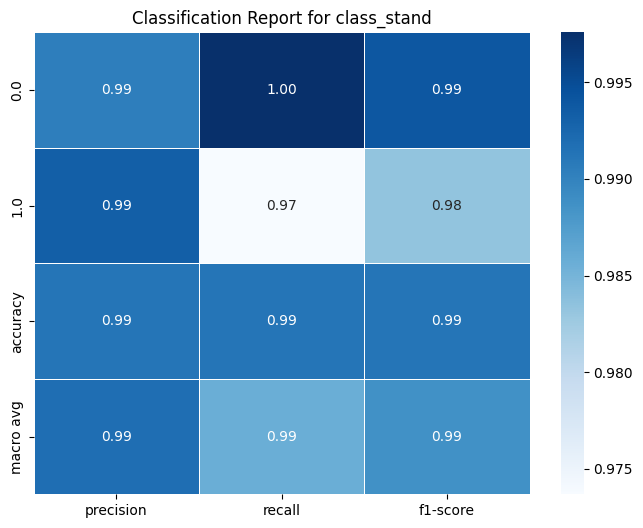

Performance for class_walk:
--------------------------------------------------


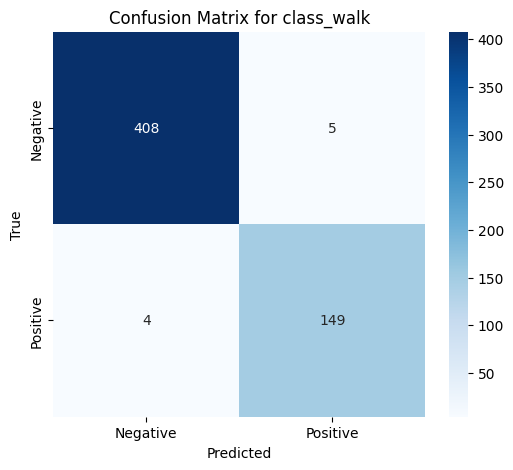

Confusion Matrix:
[[408   5]
 [  4 149]]



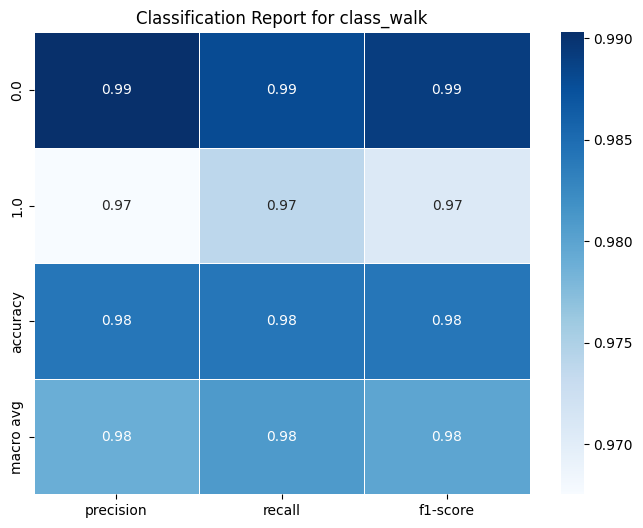

Performance for class_wave:
--------------------------------------------------


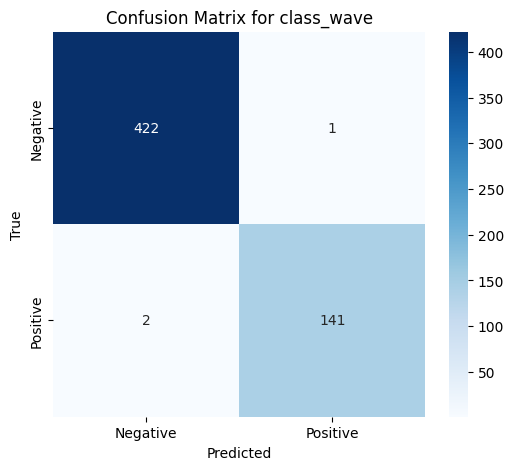

Confusion Matrix:
[[422   1]
 [  2 141]]



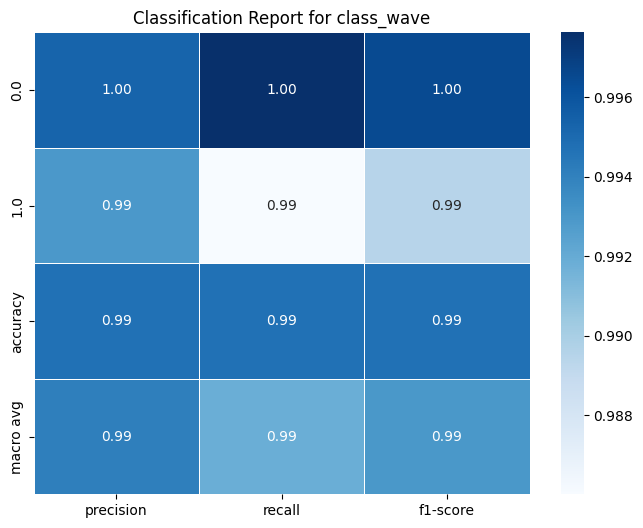

Overall Multi-label Performance:
--------------------------------------------------
Accuracy: 0.9788


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

labels = y.columns
for i, label in enumerate(labels):
    print("="*50)
    print(f"Performance for {label}:")
    print("-"*50)

    y_true = y_test.iloc[:, i]
    y_pred_label = y_pred[:, i]

    cm = confusion_matrix(y_true, y_pred_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("Confusion Matrix:")
    print(cm)
    print()

    report = classification_report(y_true, y_pred_label, zero_division=0, output_dict=True)


    # Visualisasi Classification Report
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
    plt.title(f'Classification Report for {label}')
    plt.show()

    print("="*50)

print("="*50)
print("Overall Multi-label Performance:")
print("-"*50)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("="*50)
